In [2]:
import pandas as pd                 #libreria para manejo de datos
import numpy as np                  #libreria para manejo de datos

import matplotlib.pyplot as plt     #libreria para graficos
import seaborn as sns               #libreria para graficos

import statsmodels.api as sm        #libreria para modelos estadisticos
from sklearn.metrics import mean_squared_error  #libreria para metricas de error

import random                 #mean_squared_error(y_true, y_pred) es la media del cuadrado de los errores

In [3]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel("./Data/Ventas_portal3.xlsx")

# Mostrar las dimensiones del DataFrame (filas, columnas)
print(df.shape)

#pd.set_option('display.max_rows', None) # Mostrar todas las filas
pd.set_option('display.max_columns', None) # Mostrar todas las columnas

(22393, 35)


In [4]:
df.head()

,id,date_creation,is_actived,venta,motivo_is_actived,causal_anulacion_id,Genero,id_genero,Edad,city_owner,category,type_service,estrato,plan,id_plan,id_plan_open,price_plan,user_creation_id,cdo,contract,package,plan_type,zone,nombre_zone,type_ide,nombre_type_ide,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,fecha_retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
0,33,2022-12-21 19:02:58.730,Orden creada,1,NaN,NaN,H,1,25,Cali,Residencial,45,4,DPL BA 200MB+VOZ ILIM-22,1260,1296,0,64,0,47161108.0,0,Dupla,0,NaN,2,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN
1,36,2022-12-22 14:27:15.660,Orden creada,1,NaN,NaN,M,2,36,Cali,Residencial,45,3,TRPLE TV+TEL ILIM+INT 100MB-22,1265,1301,0,67,0,47161216.0,0,Triple,0,NaN,2,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN
2,38,2022-12-26 14:46:43.920,Orden creada,1,NaN,NaN,H,1,20,Cali,Residencial,45,3,TRPLE TV+TEL ILIM+INT 100MB-22,1265,1301,0,70,0,47162234.0,0,Triple,0,NaN,2,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN
3,40,2023-01-06 20:32:13.890,Rechazado,1,Otra,NaN,H,1,25,Cali,Residencial,45,3,DPL BA 80MB+VOZ ILIM-22,1258,1294,0,77,0,NaN,0,Dupla,0,NaN,2,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN
4,42,2023-01-13 17:11:42.370,Rechazado,1,Otra,NaN,H,1,35,Jamundi,Residencial,45,4,DPL BA 100MB+VOZ ILIM-22,1259,1295,0,55,0,NaN,0,Dupla,0,NaN,2,CC,NaN,NaN,NO,NaT,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe(include = "all")

,id,date_creation,is_actived,venta,motivo_is_actived,causal_anulacion_id,Genero,id_genero,Edad,city_owner,category,type_service,estrato,plan,id_plan,id_plan_open,price_plan,user_creation_id,cdo,contract,package,plan_type,zone,nombre_zone,type_ide,nombre_type_ide,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,fecha_retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
count,22393.000000,22393,22393,22393.0,2959,329.000000,22393,22393.000000,22393.000000,22393,22393,22393.000000,22393.000000,22393,22393.000000,22393.000000,22393.000000,22393.000000,22393,1.935200e+04,22393.000000,22393,22393.000000,22236,22393.000000,22393,1606,1606,22393,1606,21816.000000,21816,21816.000000,21816,21816.000000
unique,NaN,NaN,7,NaN,13,NaN,2,NaN,NaN,5,5,NaN,NaN,20,NaN,NaN,NaN,NaN,11064,NaN,NaN,3,NaN,4,NaN,5,4,32,2,NaN,NaN,386,NaN,38,NaN
top,NaN,NaN,Orden creada,NaN,Deuda,NaN,H,NaN,NaN,Cali,Residencial,NaN,NaN,DPL BA 250MB+VOZ ILIM-24,NaN,NaN,NaN,NaN,0005S2313,NaN,NaN,Dupla,NaN,O,NaN,CC,Anulacion,Cliente en cartera,NO,NaN,NaN,Manuela Beltran,NaN,Comuna 14,NaN
freq,NaN,NaN,19253,NaN,824,NaN,14045,NaN,NaN,21226,22220,NaN,NaN,4362,NaN,NaN,NaN,NaN,32,NaN,NaN,18019,NaN,6933,NaN,22276,639,500,20787,NaN,NaN,788,NaN,2579,NaN
mean,11375.507659,2024-06-19 02:37:08.891686912,NaN,1.0,NaN,25.328267,NaN,1.372795,41.863618,NaN,NaN,45.010807,2.650426,NaN,1270.233287,1307.136561,69312.502568,14193.391953,NaN,4.566018e+07,0.025633,NaN,2.548028,NaN,2.019158,NaN,NaN,NaN,NaN,2024-08-28 03:22:09.777085952,207.947149,NaN,14.356940,NaN,1.058352
min,33.000000,2022-12-21 19:02:58.730000,NaN,1.0,NaN,17.000000,NaN,1.000000,18.000000,NaN,NaN,41.000000,1.000000,NaN,1239.000000,0.000000,0.000000,1.000000,NaN,1.491710e+05,0.000000,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2023-06-01 10:30:41,0.000000,NaN,0.000000,NaN,0.000000
25%,5757.000000,2024-03-20 15:33:51.670000128,NaN,1.0,NaN,25.000000,NaN,1.000000,30.000000,NaN,NaN,45.000000,2.000000,NaN,1260.000000,1296.000000,61965.000000,8228.000000,NaN,4.681022e+07,0.000000,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-05-23 16:35:35.500000,115.000000,NaN,8.000000,NaN,1.000000
50%,11377.000000,2024-06-18 13:50:53.380000,NaN,1.0,NaN,25.000000,NaN,1.000000,42.000000,NaN,NaN,45.000000,2.000000,NaN,1272.000000,1309.000000,66399.000000,14238.000000,NaN,4.681716e+07,0.000000,NaN,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-09-30 22:31:25,210.000000,NaN,14.000000,NaN,1.000000
75%,16993.000000,2024-09-25 17:27:05.640000,NaN,1.0,NaN,26.000000,NaN,2.000000,53.000000,NaN,NaN,45.000000,3.000000,NaN,1280.000000,1318.000000,70549.000000,20350.000000,NaN,4.682400e+07,0.000000,NaN,4.000000,NaN,2.000000,NaN,NaN,NaN,NaN,2024-12-12 13:02:31.249999872,260.000000,NaN,18.000000,NaN,1.000000
max,22627.000000,2025-03-01 15:17:29.170000,NaN,1.0,NaN,27.000000,NaN,2.000000,66.000000,NaN,NaN,48.000000,6.000000,NaN,1282.000000,1320.000000,149999.000000,26748.000000,NaN,4.722259e+07,1.000000,NaN,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,2025-02-28 16:57:52,867.000000,NaN,46.000000,NaN,4.000000


> Justificacion:

✅ El análisis de los datos históricos de solicitudes, estrato socioeconómico, tipo de plan y ajustes de precio permite identificar patrones de demanda y preferencias por segmento. Mediante técnicas de Ciencia de Datos y modelos predictivos, es posible anticipar qué planes tienen mayor probabilidad de ser contratados por cada estrato. Esta información facilita la personalización de ofertas, la optimización de precios y el diseño de campañas comerciales más efectivas, alineadas con las necesidades reales de los clientes.

> Descripcion:

La organización necesita identificar qué tipos de planes de internet son más demandados en cada estrato socioeconómico de los clientes en Cali. Si bien los planes ofrecidos son los mismos para todos, el valor de cada plan varía según el estrato, lo que puede influir en la decisión de compra. Conocer estas preferencias permitirá ajustar las estrategias comerciales, optimizar las ofertas y definir campañas más efectivas y alineadas con las características y capacidades de pago de cada segmento.

> PREGUNTA SMART

¿Qué tipo de planes de internet (por velocidad o categoría) tienen mayor probabilidad de ser contratados en los próximos 3 meses, segmentados por estrato socioeconómico, con base en el histórico de ventas, rechazos y características de clientes en Cali?


* Específica:   Define los tipo de planes, en Cali, segmentado por estrato, y con histórico de ventas, rechazados y características.

* Medible	Se puede medir con frecuencias, tasas de aceptación/rechazo, tendencias históricas y modelos predictivos.

* Accionable	Existen datos históricos disponibles y herramientas analíticas (Python, pandas, scikit-learn) para desarrollar el análisis.

* Realista	Permite tomar decisiones estratégicas: diseñar planes por segmento, ajustar campañas y anticipar demanda.

* Temporal	Define un horizonte de análisis a "los próximos meses", lo que permite actualizaciones periódicas y adaptación al mercado.

In [31]:
#df.isna().sum()                
null_counts = df.isna().sum()
print("Columnas con datos nulos:\n{}".format(null_counts[null_counts > 0]))            

Columnas con datos nulos:
motivo_is_actived                 19434
contract                           3041
nombre_zone                         157
causal_anulacion_id               22064
ventas_Retiradas_causales         20780
ventas_Retiradas_nombre_causal    20780
fecha_retiro                      20780
id_barrios                          577
Barrios                             577
id_comuna                           577
Comuna                              577
barrios_id_ciudades                 577
fecha_retiro.1                    20780
dtype: int64


> La importancia de la seleccion de la variable estrato esta definida en lo siguiente:

- Segmentación socioeconómica: El estrato es un indicador clave en Colombia para conocer el nivel socioeconómico de los hogares. Va de 1 (bajo-bajo) a 6 (alto).

- Poder adquisitivo: Permite identificar qué tipos de planes son más demandados por cada segmento de la población.

- Diseño de ofertas: Las empresas de telecomunicaciones suelen crear planes específicos según estratos, con precios y beneficios adaptados a cada nivel socioeconómico.

- Comportamiento de compra: En estratos bajos, puede haber más interés en planes económicos, mientras que en estratos altos podría haber más preferencia por planes premium.

- Predicción de ventas: Al analizar el comportamiento histórico por estrato, es posible identificar tendencias y predecir la demanda futura.

In [ ]:
df.estrato.value_counts()   #Cantidad de valores por categoria

estrato
2    6611
3    5652
1    4933
4    2701
5    1540
6     956
Name: count, dtype: int64

In [7]:
df.estrato.value_counts("normalize = True") * 100   #porcentaje

estrato
2    29.522619
3    25.240030
1    22.029206
4    12.061805
5     6.877149
6     4.269191
Name: proportion, dtype: float64

In [ ]:
#Resumen de la variable estrato: cantidad, media, desviacion estandar, minimo, percentiles, maximo
print(df['estrato'].describe())     

count    22393.000000
mean         2.650426
std          1.354329
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: estrato, dtype: float64


In [13]:
df['estrato'].value_counts().idxmax() # El valor que más se repite

2

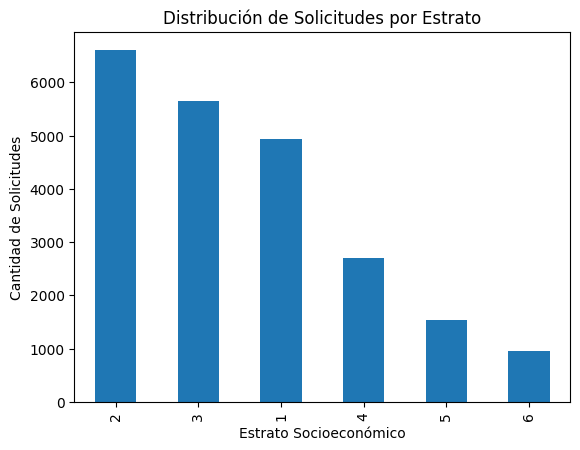

In [11]:
#df.estrato.value_counts().sort_index().plot(kind="bar")
df.estrato.value_counts().plot(kind="bar")
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Cantidad de Solicitudes")
plt.title("Distribución de Solicitudes por Estrato")
plt.show()

La mayoría de las solicitudes de servicios de telecomunicaciones provienen de estratos bajos y medios (1, 2 y 3), lo que indica que este segmento es el mercado objetivo principal para la organización.

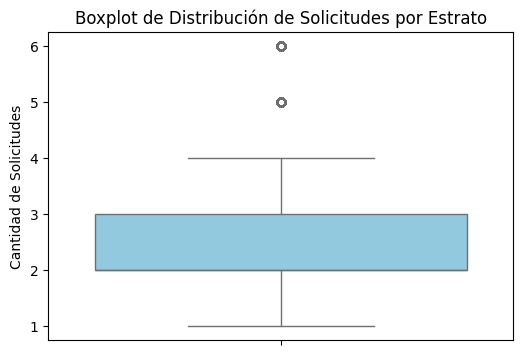

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['estrato'], color='skyblue')

plt.title('Boxplot de Distribución de Solicitudes por Estrato')
plt.ylabel("Cantidad de Solicitudes")

plt.show()

En este caso, los estratos 5 y 6 (outliers) aparecen como puntos fuera de la caja, lo que indica que son menos comunes.

> Conclusiones de la variable estrato (Análisis Univariado)

**Distribución concentrada en estratos bajos y medios:**

La mayoría de las solicitudes provienen de los estratos 2 y 3, seguidos por el estrato 1. Esto indica que los segmentos socioeconómicos bajos y medios son los principales clientes potenciales de los servicios de internet.

**Poca participación de estratos altos:**

Los estratos 5 y 6 tienen una baja proporción de solicitudes, lo que sugiere que en esos niveles socioeconómicos podría existir menor interés o mayor competencia con otros proveedores.

**Tendencia central:**

El boxplot muestra que los valores típicos (mediana) se encuentran entre estrato 2 y 3, lo que coincide con la mayor cantidad de solicitudes observadas en el gráfico de barras.

**Outliers:**

Se observan algunos valores atípicos (estrato 5 y 6) que, aunque no son frecuentes, representan oportunidades específicas que podrían abordarse con ofertas personalizadas.

In [21]:
numerical_features = df.select_dtypes(include=['int64']).columns # !!! Seleccionar las columnas numéricas

print("Numerical Features: ", numerical_features)
print(len(numerical_features))

Numerical Features:  Index(['id', 'venta', 'id_genero', 'Edad', 'type_service', 'estrato',
       'id_plan', 'id_plan_open', 'price_plan', 'user_creation_id', 'package',
       'zone', 'type_ide'],
      dtype='object')
13


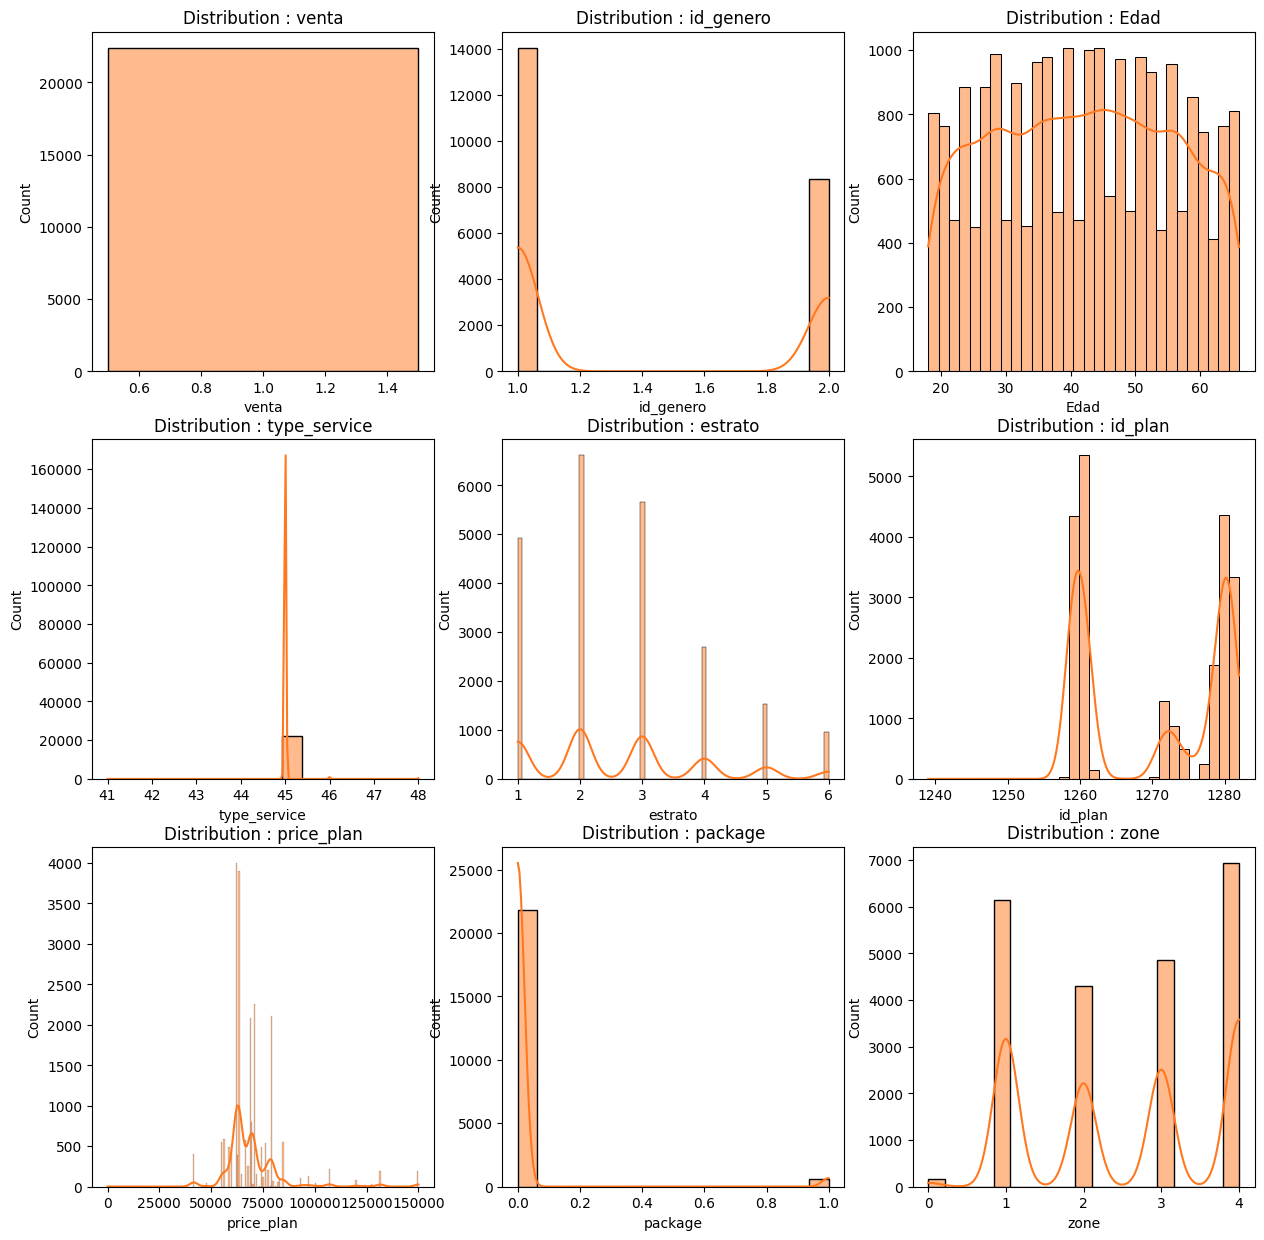

In [ ]:
#Grafico de distribucion de las variables numericas

selected_features = ['venta', 'id_genero', 'Edad', 'type_service', 'estrato',
                    'id_plan', 'price_plan', 'package', 'zone']
df_selected = df[selected_features]
colors = ['#FF781F','#2D2926']

fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(selected_features)):
    plt.subplot(3,3,i+1)
    sns.histplot(df[selected_features[i]],color = colors[0],kde=True)
    title = 'Distribution : ' + selected_features[i]
    plt.title(title)
plt.show()


> Preparacion y Limpieza:

In [23]:
df.isnull().values.any()    #Verificar si hay valores nulos

True

In [17]:
df.isna().sum().sum()

109942

In [24]:
missing_data = df.isnull()
missing_data.head(5)

,id,date_creation,is_actived,venta,motivo_is_actived,causal_anulacion_id,Genero,id_genero,Edad,city_owner,category,type_service,estrato,plan,id_plan,id_plan_open,price_plan,user_creation_id,cdo,contract,package,plan_type,zone,nombre_zone,type_ide,nombre_type_ide,ventas_Retiradas_causales,ventas_Retiradas_nombre_causal,Retiro,fecha_retiro,id_barrios,Barrios,id_comuna,Comuna,barrios_id_ciudades
0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,True,True,True,True
1,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,True,True,True,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,True,True,True,True
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,True,True,True,True,True,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,True,True,True,True,True,True
